Import Modules

In [22]:
import requests
import json
import time
import itertools
import os
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import pickle
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import defaultdict

Data Analysis

Total Examples: 2599


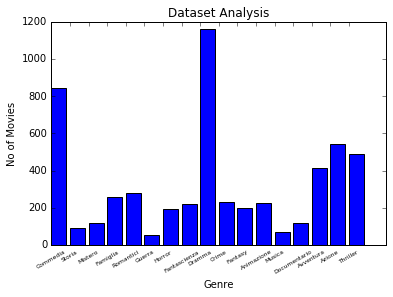

In [23]:
with open('newdata.json') as f:
    data = json.load(f)

si = len(data)
print("Total Examples: {}".format(si));

fre = {}

for i in range(si):
	#url = data[i]["poster_movie_url"]
	for key in data[i]:
		if(data[i][key]==1):
			if(key not in fre):
				fre[key]=1
			else:
				fre[key]+=1

label = []
no_movies = []

for key in fre:
	label.append(key)
	no_movies.append(fre[key])


index = np.arange(len(label))
plt.bar(index, no_movies)
plt.xlabel('Genre', fontsize=10)
plt.ylabel('No of Movies', fontsize=10)
plt.xticks(index, label, fontsize=6, rotation=30)
plt.title('Dataset Analysis')
plt.show()


In [24]:
#To create a map between genre id of each genre and name of the genre
GenreIDToName={}
genreNameBuild = ['Crime', 'Dramma', 'Thriller', 'Musica', 'Fantasy', 'Fantascienza','Animazione', 'Horror', 
'Commedia', 'Avventura', 'Romantici', 'Documentario', 'Famiglia', 'Mistero', 'Storia', 'Azione', 'Guerra']
genreNameBuild.sort()
for i in range(len(genreNameBuild)):
	GenreIDToName[i]=genreNameBuild[i]
print(genreNameBuild)

['Animazione', 'Avventura', 'Azione', 'Commedia', 'Crime', 'Documentario', 'Dramma', 'Famiglia', 'Fantascienza', 'Fantasy', 'Guerra', 'Horror', 'Mistero', 'Musica', 'Romantici', 'Storia', 'Thriller']


Input Vector using Word Embeddings

In [25]:
#### Stop Words stored manually
with open('stopwords_italian.txt', 'r') as file :
        stop_words = set(file.read().split('\n'))
        stop_dict = defaultdict(int)
        for word in stop_words:
            stop_dict[word] = 1

movieMeanWordvec=np.zeros((len(data),300))
movieMeanWordvec.shape

model = Word2Vec.load('glove/berardi/glove_WIKI') # glove model
rows_to_delete=[]

for i in range(len(data)):
    text = data[i]["summary"]
    if(text==None):
        rows_to_delete.append(i)
        continue
    tokens = word_tokenize(text)
    #print(tokens)
    tokens = [word for word in tokens if stop_dict[word] != 1]
    if(len(tokens)==0):
        continue
    s=0
    count_in_vocab = 0
    for token in tokens:
        if token.lower() in model.wv.vocab:
            count_in_vocab+=1
            s+=model.wv[token.lower()]
    if count_in_vocab!=0:
            movieMeanWordvec[i]=s/float(count_in_vocab)
    print("done for {}".format(i))
 

done for 0
done for 1
done for 2
done for 3
done for 4
done for 5
done for 6
done for 7
done for 8
done for 9
done for 10
done for 11
done for 12
done for 13
done for 14
done for 15
done for 16
done for 17
done for 18
done for 19
done for 20
done for 21
done for 22
done for 23
done for 24
done for 25
done for 26
done for 27
done for 28
done for 29
done for 30
done for 31
done for 32
done for 33
done for 34
done for 35
done for 36
done for 37
done for 38
done for 39
done for 40
done for 41
done for 42
done for 43
done for 44
done for 45
done for 46
done for 47
done for 48
done for 49
done for 50
done for 51
done for 52
done for 53
done for 54
done for 55
done for 56
done for 57
done for 58
done for 59
done for 60
done for 61
done for 63
done for 64
done for 65
done for 66
done for 67
done for 68
done for 69
done for 71
done for 72
done for 73
done for 74
done for 75
done for 76
done for 77
done for 78
done for 79
done for 80
done for 81
done for 82
done for 83
done for 84
done for 85
do

done for 771
done for 772
done for 773
done for 774
done for 775
done for 776
done for 777
done for 778
done for 779
done for 780
done for 781
done for 782
done for 783
done for 784
done for 785
done for 786
done for 787
done for 788
done for 789
done for 790
done for 791
done for 792
done for 793
done for 794
done for 795
done for 796
done for 797
done for 798
done for 799
done for 800
done for 801
done for 802
done for 803
done for 804
done for 805
done for 806
done for 807
done for 808
done for 809
done for 810
done for 811
done for 812
done for 813
done for 814
done for 815
done for 816
done for 817
done for 818
done for 819
done for 820
done for 821
done for 822
done for 823
done for 824
done for 825
done for 826
done for 827
done for 828
done for 829
done for 830
done for 831
done for 832
done for 833
done for 834
done for 835
done for 836
done for 837
done for 838
done for 839
done for 840
done for 841
done for 842
done for 843
done for 844
done for 845
done for 846
done for 847

done for 1484
done for 1485
done for 1486
done for 1487
done for 1488
done for 1489
done for 1490
done for 1491
done for 1492
done for 1493
done for 1494
done for 1495
done for 1496
done for 1497
done for 1498
done for 1499
done for 1500
done for 1501
done for 1502
done for 1503
done for 1504
done for 1505
done for 1506
done for 1507
done for 1508
done for 1509
done for 1510
done for 1511
done for 1512
done for 1513
done for 1514
done for 1515
done for 1516
done for 1517
done for 1518
done for 1519
done for 1520
done for 1521
done for 1522
done for 1523
done for 1524
done for 1525
done for 1526
done for 1527
done for 1528
done for 1529
done for 1530
done for 1531
done for 1532
done for 1533
done for 1534
done for 1535
done for 1536
done for 1537
done for 1538
done for 1539
done for 1540
done for 1541
done for 1542
done for 1543
done for 1544
done for 1545
done for 1546
done for 1547
done for 1548
done for 1549
done for 1550
done for 1551
done for 1552
done for 1553
done for 1554
done f

done for 2122
done for 2123
done for 2124
done for 2125
done for 2126
done for 2127
done for 2128
done for 2129
done for 2130
done for 2131
done for 2132
done for 2133
done for 2134
done for 2135
done for 2136
done for 2137
done for 2138
done for 2139
done for 2140
done for 2141
done for 2142
done for 2143
done for 2144
done for 2145
done for 2146
done for 2147
done for 2148
done for 2149
done for 2150
done for 2151
done for 2152
done for 2153
done for 2154
done for 2155
done for 2156
done for 2157
done for 2158
done for 2159
done for 2160
done for 2161
done for 2162
done for 2163
done for 2164
done for 2165
done for 2166
done for 2167
done for 2168
done for 2169
done for 2170
done for 2171
done for 2172
done for 2173
done for 2174
done for 2175
done for 2176
done for 2177
done for 2178
done for 2179
done for 2180
done for 2181
done for 2182
done for 2183
done for 2184
done for 2185
done for 2186
done for 2187
done for 2188
done for 2189
done for 2190
done for 2191
done for 2192
done f

In [26]:
mask2=[]
for row in range(len(movieMeanWordvec)):
    if row in rows_to_delete:
        mask2.append(False)
    else:
        mask2.append(True)
X=movieMeanWordvec[mask2]
X.shape

(2592, 300)

Output Vector in terms of binary multilabel representation

In [28]:
genres=[]
allIds=[]
for i in range(len(data)) :
    if i in rows_to_delete:
        continue
    temp = []
    j=0
    for genre in label :
        if(data[i][genre]==1):
            temp.append(j)
        j+=1
    genres.append(temp)
    allIds.extend(temp)
    
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
Y=mlb.fit_transform(genres)
print(Y[0])
print mlb.classes_
print Y.shape
print len(label)
        

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
(2592, 17)
17


In [30]:
textualFeatures=(X,Y)
print X.shape
print Y.shape

(2592, 300)
(2592, 17)


In [31]:
#Again, dividing data into test set and train set
mask = np.random.rand(len(X)) < 0.8
XTrain=X[mask]
XTest=X[~mask]
YTrain=Y[mask]
YTest=Y[~mask]

(521, 300)

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Activation

modelTextual = Sequential([
    Dense(300, input_shape=(300,)),
    Activation('relu'),
    Dense(100),
    Activation('relu'),
    Dense(17),
    Activation('softmax'),
])

modelTextual.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [52]:
modelTextual.fit(XTrain, YTrain, epochs=30, batch_size=64)
#modelTextual.fit(XTrain, YTrain, epochs=1, batch_size=500,verbose=0)

Epoch 1/30
2071/2071 [==============================] - 0s 144us/step - loss: 0.3665 - acc: 0.8762
Epoch 2/30
2071/2071 [==============================] - 0s 79us/step - loss: 0.3495 - acc: 0.8762
Epoch 3/30
2071/2071 [==============================] - 0s 77us/step - loss: 0.3379 - acc: 0.8762
Epoch 4/30
2071/2071 [==============================] - 0s 86us/step - loss: 0.3270 - acc: 0.8762
Epoch 5/30
2071/2071 [==============================] - 0s 76us/step - loss: 0.3180 - acc: 0.8765
Epoch 6/30
2071/2071 [==============================] - 0s 86us/step - loss: 0.3114 - acc: 0.8774
Epoch 7/30
2071/2071 [==============================] - 0s 77us/step - loss: 0.3044 - acc: 0.8782
Epoch 8/30
2071/2071 [==============================] - 0s 79us/step - loss: 0.2981 - acc: 0.8793
Epoch 9/30
2071/2071 [==============================] - 0s 76us/step - loss: 0.2926 - acc: 0.8806
Epoch 10/30
2071/2071 [==============================] - 0s 84us/step - loss: 0.2886 - acc: 0.8818
Epoch 11/30
2071/2

In [53]:
score = modelTextual.evaluate(XTest, YTest, batch_size=249)
YPreds=modelTextual.predict(XTest)
print(YPreds)

521/521 [==============================] - 0s 124us/step
[[6.17451407e-03 1.48713216e-03 1.07267313e-01 ... 6.17503515e-03
  7.53101185e-02 5.46777904e-01]
 [1.97097272e-01 5.19004127e-04 8.38446605e-04 ... 1.85859680e-01
  5.39416447e-02 4.08262061e-03]
 [3.08915764e-01 1.81947253e-04 2.57224161e-02 ... 8.55709333e-03
  1.54829975e-02 7.18268380e-02]
 ...
 [9.84799042e-02 5.33603765e-02 1.59877241e-02 ... 1.50155962e-01
  1.67861477e-01 6.77738711e-02]
 [9.48480051e-03 9.05967224e-03 2.48241294e-02 ... 2.59486120e-02
  3.86143029e-01 2.81061888e-01]
 [3.79422233e-02 2.50687432e-02 5.00846133e-02 ... 9.98408869e-02
  1.23883210e-01 1.54799119e-01]]


In [57]:
def precision_recall(gt,preds):
    TP=0
    FP=0
    FN=0
    for t in gt:
        if t in preds:
            TP+=1
        else:
            FN+=1
    for p in preds:
        if p not in gt:
            FP+=1
    if TP+FP==0:
        precision=0
    else:
        precision=TP/float(TP+FP)
    if TP+FN==0:
        recall=0
    else:
        recall=TP/float(TP+FN)
    return precision,recall

In [59]:
precs=[]
recs=[]
for i in range(len(YPreds)):
    row=YPreds[i]
    gtGenres=YTest[i]
    gtGenreNames=[]
    for j in range(17):
        if gtGenres[j]==1:
            gtGenreNames.append(GenreIDToName[j])
    threshold = 1.5e-1
    top = []
    for z in range(len(row)):
        if(row[z]>=threshold):
            top.append(z)
    predictedGenres=[]
    for genre in top:
        predictedGenres.append(GenreIDToName[genre])
    (precision,recall)=precision_recall(gtGenreNames,predictedGenres)
    precs.append(precision)
    recs.append(recall)
    if i%20==0:
        print "Predicted:",','.join(predictedGenres)," |      Actual:",','.join(gtGenreNames)
        
print "Mean precision = ", np.mean(np.asarray(precs)),"," ,"Mean Recalls = ", np.mean(np.asarray(recs))
p_1 = np.mean(np.asarray(precs))
r_1 = np.mean(np.asarray(recs))
score_f = (2*p_1*r_1)/(p_1+r_1)
print("F1 Score :{}".format(score_f))


Predicted: Thriller  |      Actual: Dramma
Predicted: Famiglia,Romantici,Storia  |      Actual: Commedia,Horror,Romantici
Predicted: Famiglia,Horror,Romantici,Storia  |      Actual: Famiglia,Romantici,Storia
Predicted: Fantascienza,Thriller  |      Actual: Azione,Crime,Fantascienza,Fantasy
Predicted: Fantascienza  |      Actual: Crime,Fantascienza
Predicted: Fantascienza  |      Actual: Avventura,Fantascienza
Predicted: Dramma,Thriller  |      Actual: Dramma
Predicted: Animazione,Thriller  |      Actual: Fantascienza,Fantasy
Predicted: Fantascienza,Thriller  |      Actual: Animazione,Crime,Storia,Thriller
Predicted: Fantascienza  |      Actual: Documentario,Fantascienza,Romantici,Thriller
Predicted: Animazione,Commedia  |      Actual: Animazione
Predicted: Animazione,Commedia,Horror  |      Actual: Commedia,Horror
Predicted: Animazione  |      Actual: Fantascienza
Predicted: Animazione,Fantascienza  |      Actual: Animazione,Commedia,Fantascienza,Mistero
Predicted: Romantici,Storia  | 